In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

import random

In [5]:
np.random.seed(0)

In [6]:
( X_train, y_train ), ( X_test, y_test ) = mnist.load_data()

In [7]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [8]:
assert( X_train.shape[ 0 ] == y_train.shape[ 0 ]), "Training data: #images != #labels"
assert( X_test.shape[ 0 ] == y_test.shape[ 0 ]), "Testing data: #images != #labels"
assert( X_train.shape[ 1: ] == ( 28, 28 ) ), "The dimensions of the images have to be 28x28."
assert( X_test.shape[ 1: ] == ( 28, 28 ) ), "The dimensions of the images have to be 28x28."

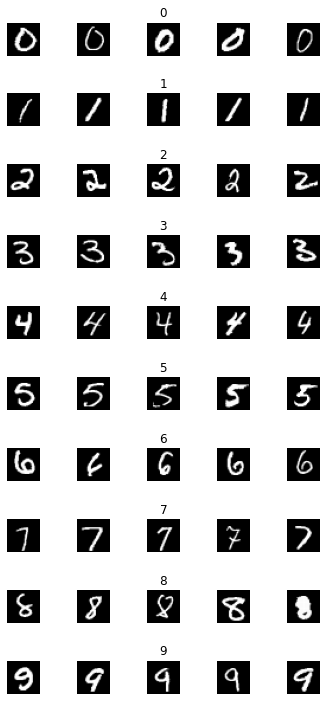

In [9]:
num_of_samples=[]

cols = 5
num_classes = 10

#fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig, axis = plt.subplots ( nrows = num_classes, ncols = cols, figsize = (5, 10) )
fig.tight_layout()
     
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[ y_train == j ]
        axis[j][i].imshow( x_selected[ random.randint( 0, len( x_selected ) - 1 ), :, : ], cmap = plt.get_cmap( "gray" ) )
        axis[j][i].axis( "off" )
        if i == 2:
            axis[j][i].set_title( str( j ) )
            num_of_samples.append( len ( x_selected ) )        

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of samples / images')

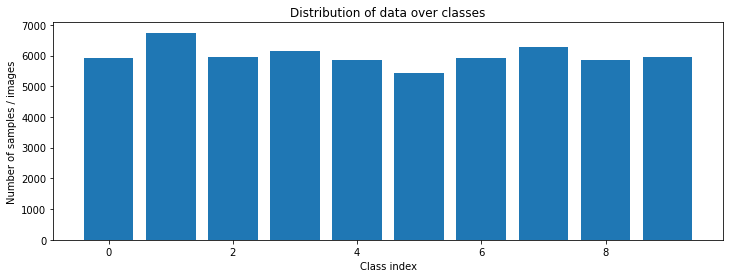

In [10]:
print( num_of_samples )
plt.figure( figsize = ( 12, 4 ) )
plt.bar( range( 0, num_classes), num_of_samples )
plt.title( "Distribution of data over classes" )
plt.xlabel( "Class index" )
plt.ylabel( "Number of samples / images" )

In [26]:
X_train_flat = X_train.reshape( ( X_train.shape[ 0 ], X_train.shape[ 1 ], X_train.shape[ 2 ], 1 ) )
X_test_flat = X_test.reshape( ( X_test.shape[ 0 ], X_test.shape[ 1 ], X_test.shape[ 2 ], 1 ) )
print( X_train_flat.shape )
print( X_test_flat.shape )

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [27]:
y_train_flat = to_categorical( y_train, num_classes )
y_test_flat = to_categorical( y_test, num_classes )

In [28]:
X_train_flat = X_train_flat / 255
X_test_flat = X_test_flat / 255

In [29]:
def leNet_model():
    model = Sequential()
    model.add(Conv2D( 30, ( 5, 5 ), input_shape = (28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D( 15, ( 3, 3 ), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [30]:
leNet = leNet_model()
print ( leNet.summary() )

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 500)               188000    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [32]:
h = leNet.fit(X_train_flat, y_train_flat, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Epoch 1/10
135/135 [==============================] - 4s 33ms/step - loss: 0.1174 - accuracy: 0.9626 - val_loss: 0.1163 - val_accuracy: 0.9637
Epoch 2/10
135/135 [==============================] - 4s 33ms/step - loss: 0.1107 - accuracy: 0.9640 - val_loss: 0.1031 - val_accuracy: 0.9693
Epoch 3/10
135/135 [==============================] - 4s 32ms/step - loss: 0.1010 - accuracy: 0.9676 - val_loss: 0.1109 - val_accuracy: 0.9697
Epoch 4/10
135/135 [==============================] - 4s 32ms/step - loss: 0.1020 - accuracy: 0.9674 - val_loss: 0.1082 - val_accuracy: 0.9687
Epoch 5/10
135/135 [==============================] - 4s 33ms/step - loss: 0.0991 - accuracy: 0.9681 - val_loss: 0.1069 - val_accuracy: 0.9655
Epoch 6/10
135/135 [==============================] - 4s 33ms/step - loss: 0.0976 - accuracy: 0.9680 - val_loss: 0.1078 - val_accuracy: 0.9692
Epoch 7/10
135/135 [==============================] - 5s 37ms/step - loss: 0.0907 - accuracy: 0.9707 - val_loss: 0.1086 - val_accuracy: 0.9712

Text(0.5, 0, 'epoch')

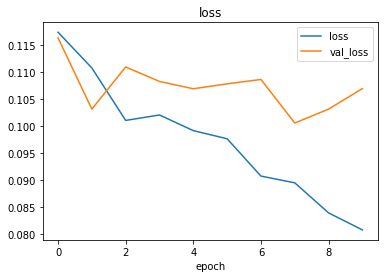

In [33]:
plt.plot( h.history[ 'loss' ] )
plt.plot( h.history[ 'val_loss' ])
plt.legend( [ 'loss', 'val_loss' ] )
plt.title( 'loss' )
plt.xlabel( 'epoch' )

Text(0.5, 0, 'epoch')

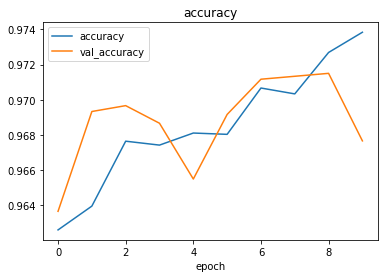

In [34]:
plt.plot( h.history[ 'accuracy' ] )
plt.plot( h.history[ 'val_accuracy' ])
plt.legend( [ 'accuracy', 'val_accuracy' ] )
plt.title( 'accuracy' )
plt.xlabel( 'epoch' )

In [36]:
score = leNet.evaluate( X_test_flat, y_test_flat, verbose=0 )
print( type( score ) )
print( "Test score:", score[ 0 ] )
print( "Test accuracy:", score[ 1 ] )

<class 'list'>
Test score: 0.1015884280204773
Test accuracy: 0.9686999917030334


predicted digit: [0]
predicted digit: [1]
predicted digit: [2]
predicted digit: [3]
predicted digit: [4]
predicted digit: [3]
WRONG PREDICTION!
predicted digit: [6]
predicted digit: [7]
predicted digit: [3]
WRONG PREDICTION!
predicted digit: [8]
WRONG PREDICTION!


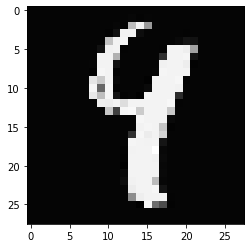

In [61]:
import cv2
#import requests
#from PIL import Image
#url = "https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png"
#response = requests.get( url, stream=True )
#print( response )
#img = Image.open( response.raw )

for x in range(0,10):
    filename = "Image/" + str(x) + ".png"
    img = Image.open( filename )
    #-----------------------------------------------
    img_array = np.asarray( img )
    img_resized = cv2.resize( img_array, ( 28, 28 ) )
    gray_scale = cv2.cvtColor( img_resized, cv2.COLOR_BGR2GRAY)
    img_inv = cv2.bitwise_not( gray_scale )
    #-----------------------------------------------
    image = img_inv / 255
    image = image.reshape( 1, 28, 28, 1 )
    #-----------------------------------------------
    prediction = np.argmax( leNet.predict( image ), axis=-1)
    print( "predicted digit:", str( prediction ) )
    if( prediction != x ):
        plt.imshow( img_inv, cmap = plt.get_cmap( "gray" ) )
        print("WRONG PREDICTION!")
